In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Uploading dataset
df= pd.read_csv('train__dataset.csv')
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [3]:
df.shape

(18137, 18)

In [4]:
#creating column "date_of_arrival" to concatenate the arrival year, month and date
df['date_of_arrival'] = df['arrival_year'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_date'].astype(str)

In [5]:
#droping the 3 columns for the arrival to only leave "date_of_arrival"
df.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

In [6]:
#changing date_of_arrival to date type
df['date_of_arrival'] = pd.to_datetime(df['date_of_arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)

# Exploration of the Distribution of Variables Representing Booking Characteristics

In [7]:
def bar_plot(column_name, data, ax):
    sns.countplot(x=column_name, data=data, ax=ax)
    ax.set_title(f'{column_name.capitalize()} Distribution')

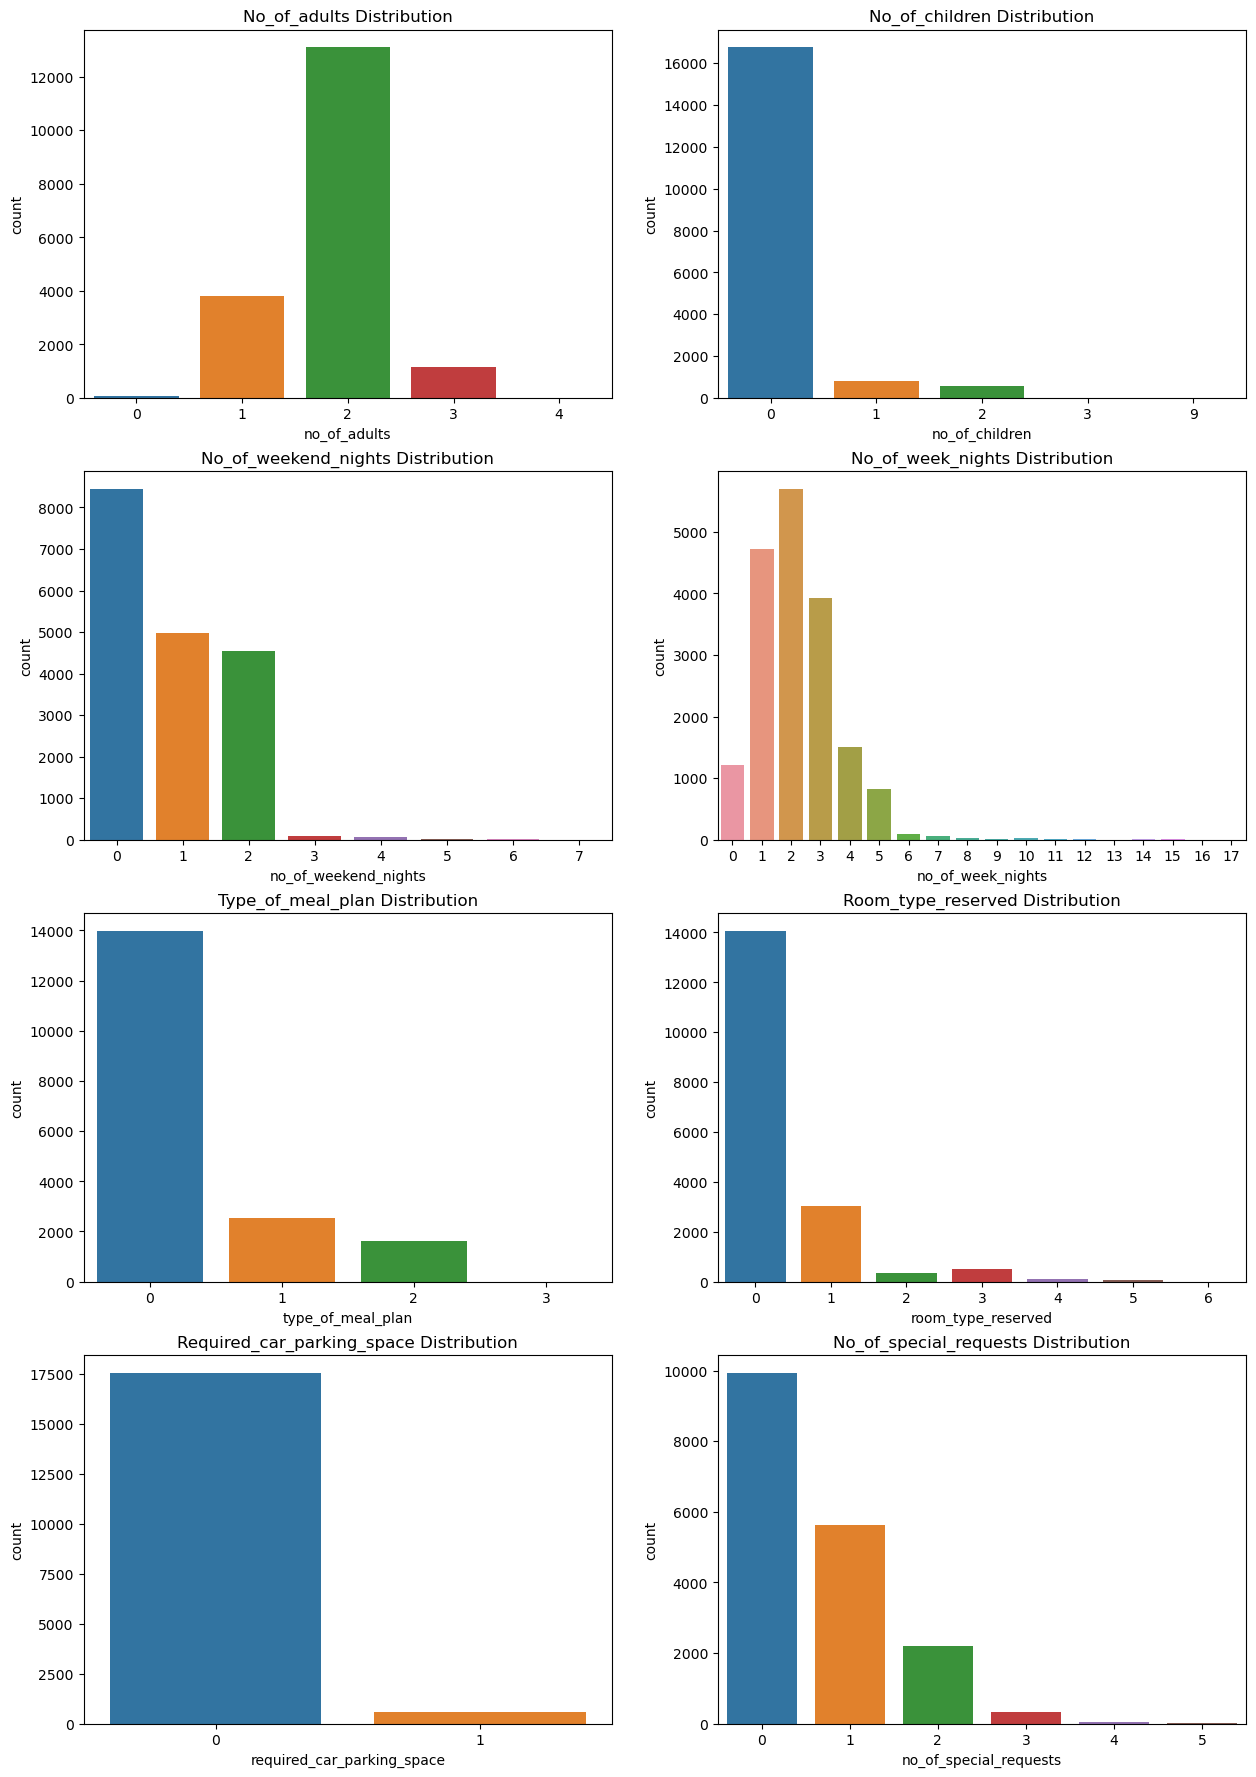

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(15, 22))
bar_plot('no_of_adults', df, ax[0,0])
bar_plot('no_of_children', df, ax[0,1])
bar_plot('no_of_weekend_nights', df, ax[1,0])
bar_plot('no_of_week_nights', df, ax[1,1])
bar_plot('type_of_meal_plan', df, ax[2,0])
bar_plot('room_type_reserved', df, ax[2,1])
bar_plot('required_car_parking_space', df, ax[3,0])
bar_plot('no_of_special_requests', df, ax[3,1])

# Distribution of Previous Bookings

In [35]:
def plot_boxplots(df, columns, figsize=(25, 5)):
    fig, ax = plt.subplots(1, len(columns), figsize=figsize)
    for i, column in enumerate(columns):
        sns.boxplot(x=column, data=df, ax=ax[i]).set_title(column)

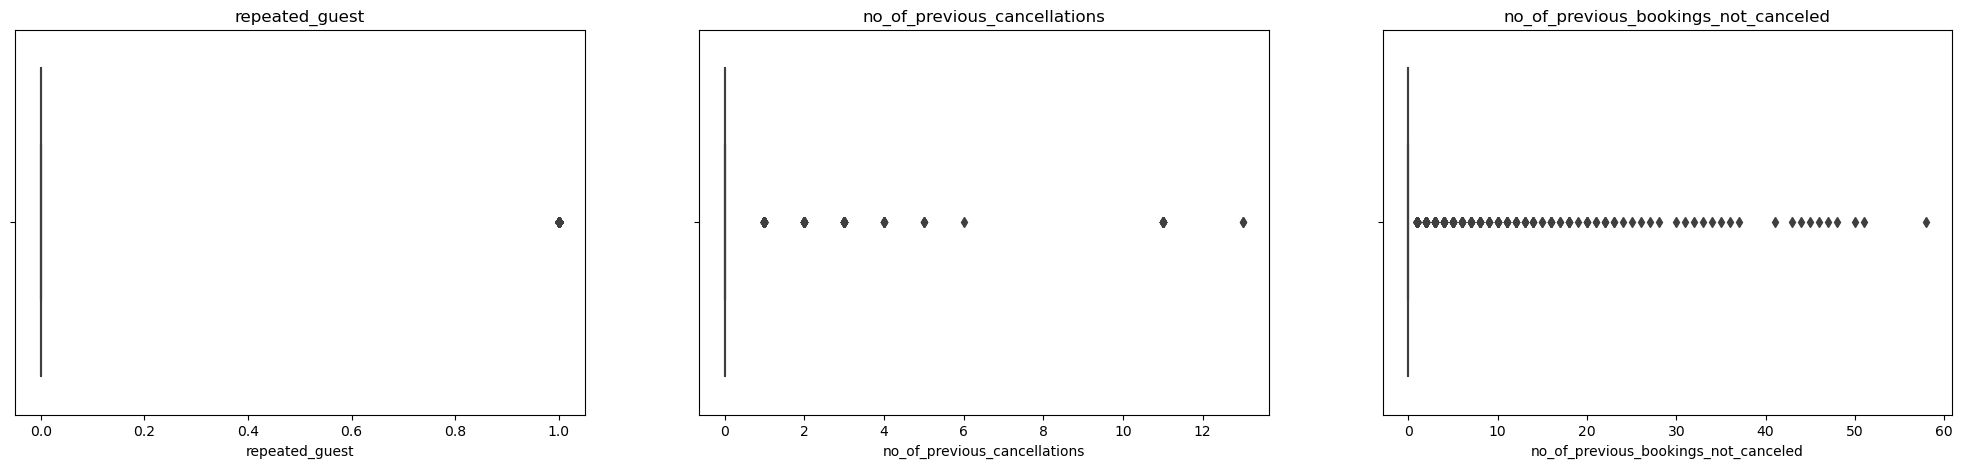

In [36]:
columns_to_plot = ['repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']
plot_boxplots(df, columns_to_plot)

# Distribution of Arrivals

Text(0.5, 1.0, 'Day of week of arrival')

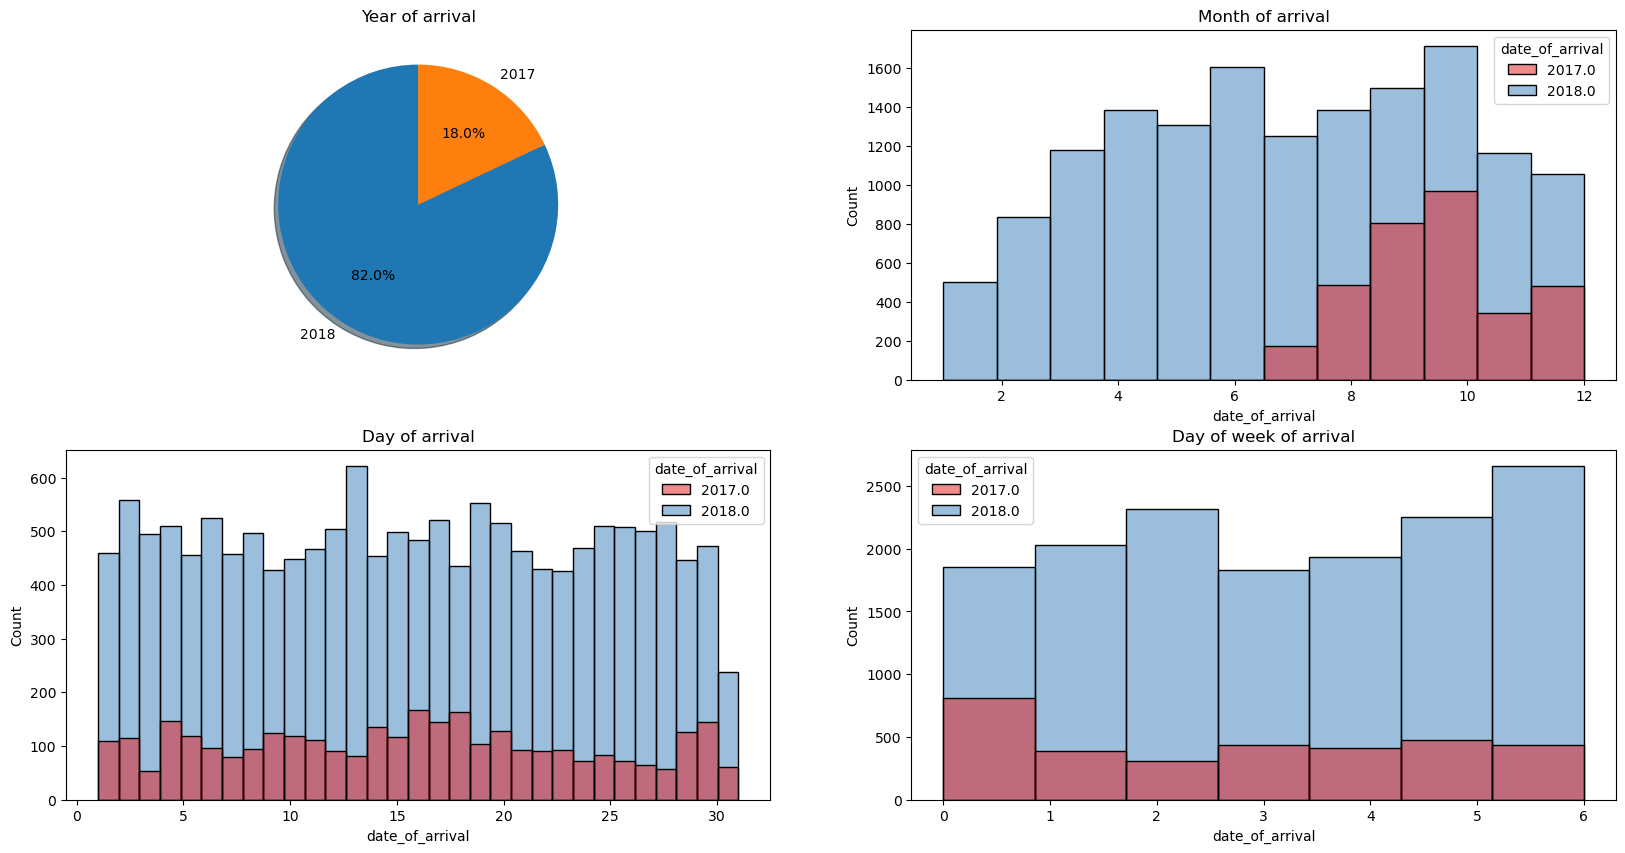

In [30]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

#year of arrival
ax[0,0].pie(df['date_of_arrival'].dt.year.value_counts(), labels = [2018,2017], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Year of arrival')

#month of arrival   
sns.histplot(x = df['date_of_arrival'].dt.month, ax=ax[0,1], bins=12, hue = df['date_of_arrival'].dt.year, palette = 'Set1').set_title('Month of arrival')

#day of arrival
sns.histplot(x = df['date_of_arrival'].dt.day, ax=ax[1,0], bins=31, hue = df['date_of_arrival'].dt.year, palette = 'Set1').set_title('Day of arrival')

#day of week of arrival
sns.histplot(x = df['date_of_arrival'].dt.dayofweek, ax=ax[1,1], bins=7, hue = df['date_of_arrival'].dt.year, palette = 'Set1').set_title('Day of week of arrival')

In [37]:
def plot_distribution(data, column, title):
    sns.distplot(data[column])
    plt.title(title)
    plt.show()

# Time Lag Between Booking Creation and Arrival Date.

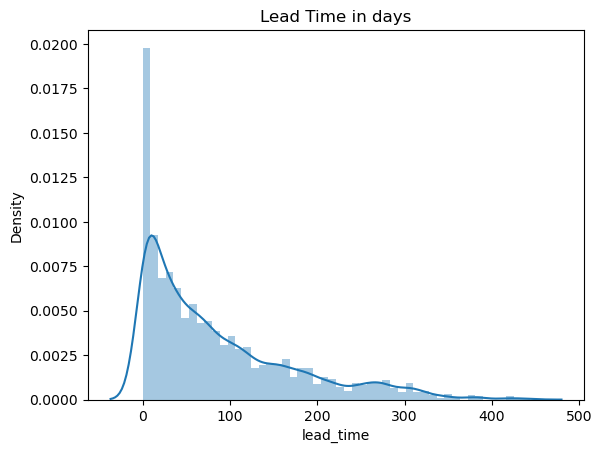

In [39]:
plot_distribution(df, 'lead_time', 'Lead Time in days')

# Average Room Price

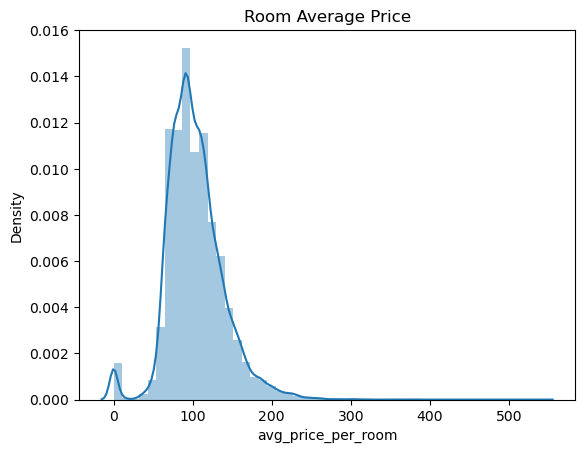

In [40]:
http://localhost:8888/notebooks/Desktop/Ironhack/Final_Project/visualization_plots.ipynb#Average-Room-Priceplot_distribution(df, 'avg_price_per_room', 'Room Average Price')

# Distribution Show vs No Show

Text(0.5, 1.0, 'Number of Children')

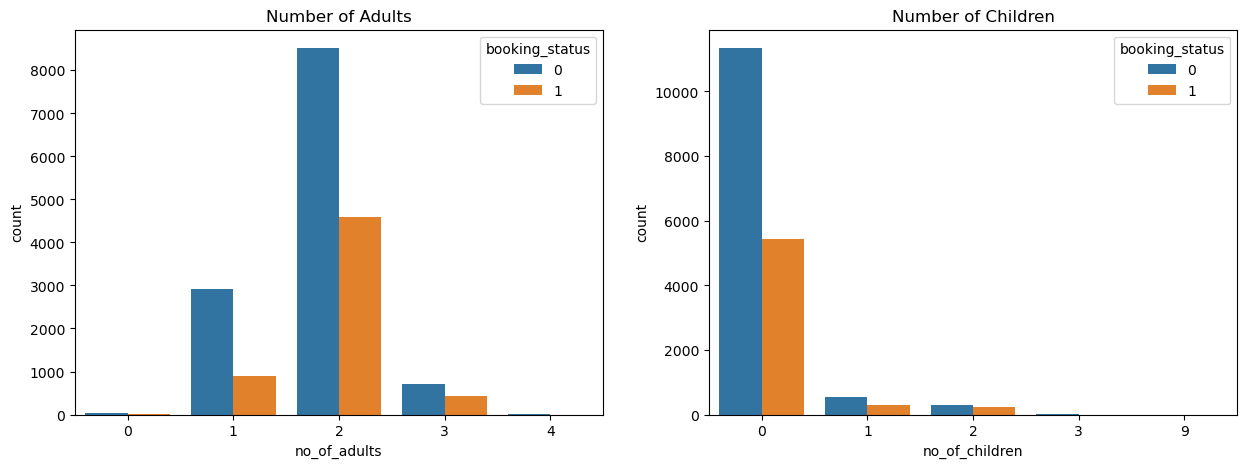

In [42]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0], hue= 'booking_status').set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Children')

Text(0.5, 1.0, 'Number of Week Nights')

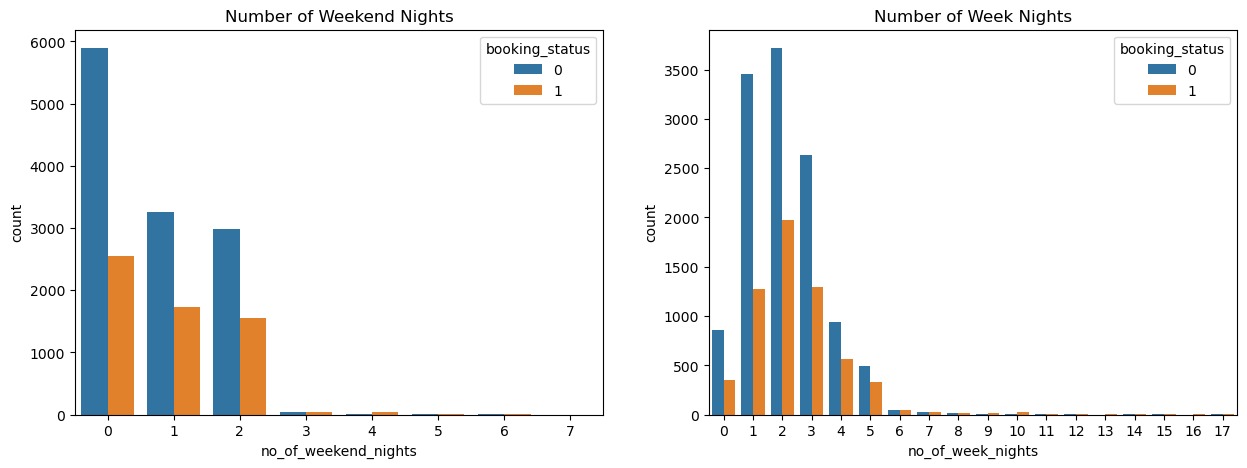

In [43]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')

Text(0.5, 1.0, 'Number of special requests')

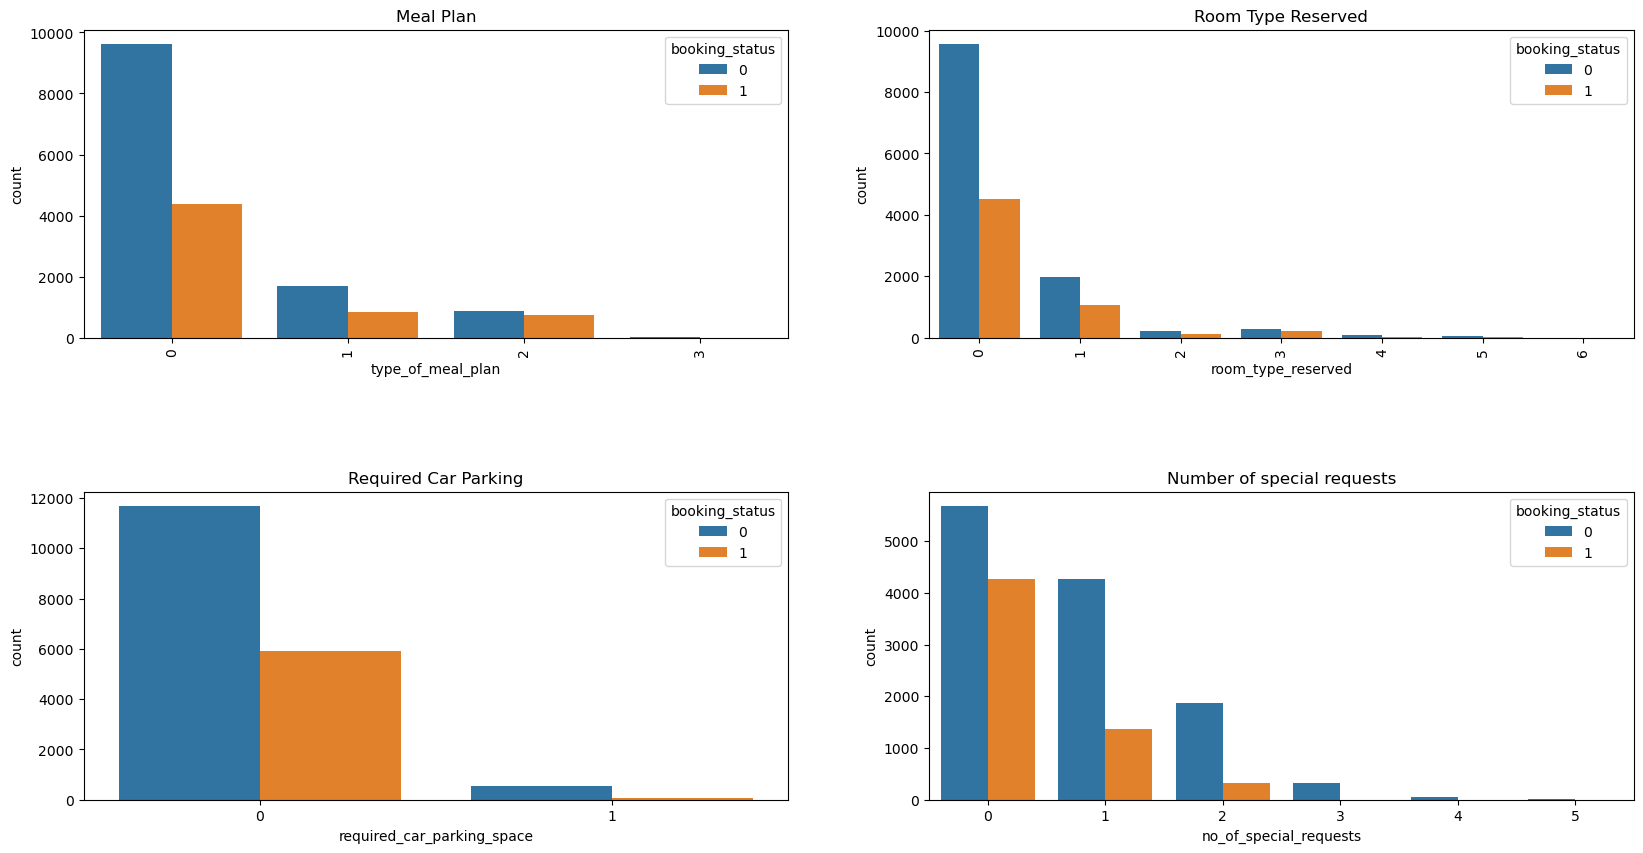

In [44]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0], hue = 'booking_status').set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1], hue = 'booking_status').set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0], hue = 'booking_status').set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1], hue = 'booking_status').set_title('Number of special requests')

Text(0.5, 1.0, 'Lead Time in days')

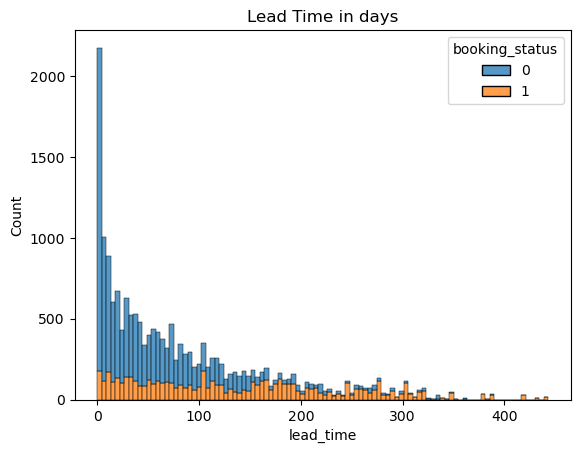

In [45]:
sns.histplot(x = 'lead_time', data = df, bins=100, hue = 'booking_status', multiple = 'stack').set_title('Lead Time in days')


Text(0.5, 1.0, 'Market Segment Type')

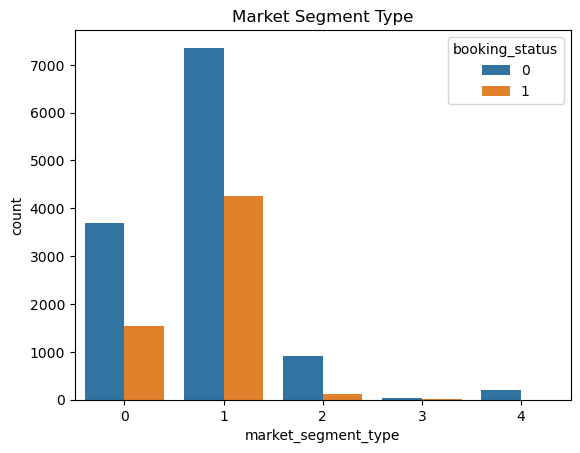

In [46]:
sns.countplot(x = 'market_segment_type', data = df, hue = 'booking_status').set_title('Market Segment Type')

Text(0.5, 1.0, 'Average Room Price')

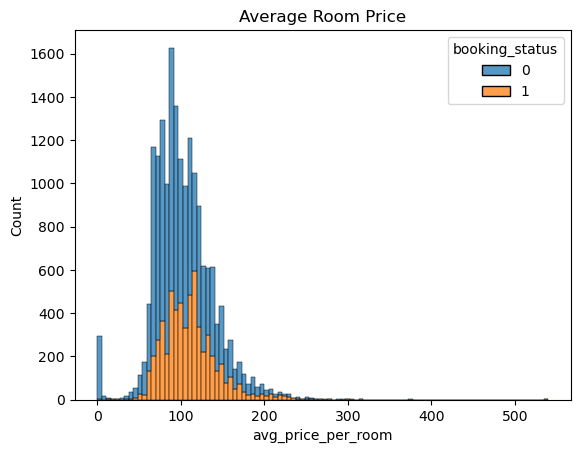

In [47]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')